# Titanic Project

##### Problem Statement:

The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 

##### Importing Libraries

In [1]:
import pandas  as  pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing the Dataset
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.shape

(891, 12)

The dataset contains 12 columns with both numerical and categorical data types. Out of 12 columns 11 are independent variables and remaining one "Survived" is the dependent(target) variable. We can also see that Ticket and Cabin column contains numeric and alphanumeric data type.

Target variable contains whether the passengers are survived or died which is labelled as 1 = Yes and 0 = No.

Here PassengerId is taken on the basis of index so we can drop that column. We will drop this column after checking correlation with the target variable.



# EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Here we can observe there are three different types of features namely, int64, object and float64.

In [5]:
#Checking the null values

df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

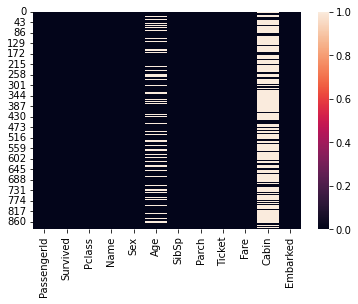

In [6]:
#Checking the null values through heatmap
sns.heatmap(df.isnull())

There are missing values in the columns Age, Cabin and Embarked. We will treat this missing values in the later part.

Also Cabin feature has more missing values so we can drop that column if necessary. But for now I am keeping it as it is.

In [7]:
# Checking the uniqueness of dataset
df['Survived'].unique()

array([0, 1], dtype=int64)

There are 2 unique catergorical values in the Label column / target variable.

In [8]:
# Checking count of number of survivors 
df["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

There are two classes in the label namely 0 and 1 in which 0 has 549 passengers who are not survived and the class 1 has 342 passengers who did survived.

<AxesSubplot:xlabel='Survived', ylabel='count'>

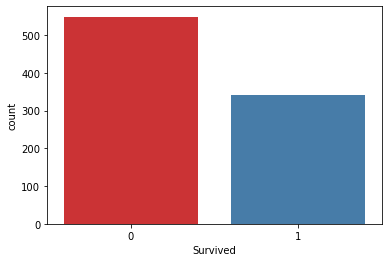

In [9]:
sns.countplot(df['Survived'], palette="Set1")

From above plot we can see data is not balanced

# Data Visualization

3    491
1    216
2    184
Name: Pclass, dtype: int64


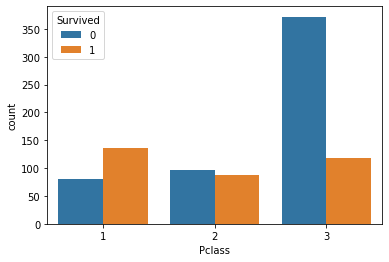

In [15]:
# Now we will find the counts of Survived in each coloumn
print(df["Pclass"].value_counts())
sns.countplot('Pclass',data=df,hue='Survived')
plt.show()

Here the Pclass contains 3 value counts. On the basis of this plot we can say that the passengers travelling in 3rd(lower) class are more and they are not survived. 1st(Upper) class and 2nd(Middle) class passengers are more likely to survive. Also there are only few passengers are travelling in the 1st class compare to the other two

male      577
female    314
Name: Sex, dtype: int64


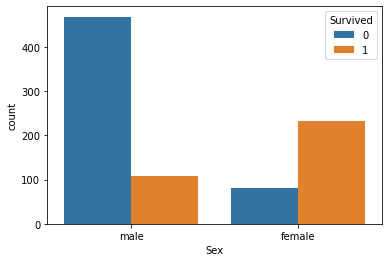

In [16]:
# Checking counts for Sex feature
print(df["Sex"].value_counts())
sns.countplot('Sex',data=df,hue='Survived')
plt.show()

Here Sex feature contains two classes male and female. Out of 891 passengers 577 are male and 314 are female. So by observing the data we can say that the survival rate of female passengers are more than male passengers.

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


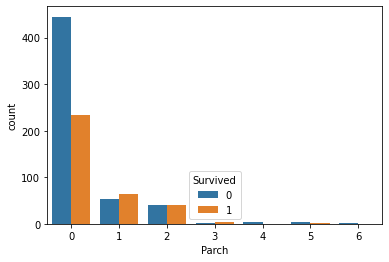

In [18]:
# Checking count in the Parch
print(df["Parch"].value_counts())
sns.countplot('Parch',data=df,hue='Survived')
plt.show()

From this plot we can see most of the passengers are travelled alone which is named as 0 in the plot. We can say almost 80% of the passengers are alone, 15% of the passengers are travelled either with their children or parents and remaining 5% of them are travelled with group.

S    644
C    168
Q     77
Name: Embarked, dtype: int64


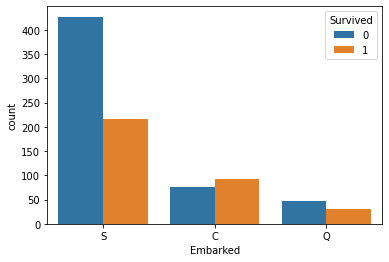

In [19]:
# Checking count in the Embarkation

print(df["Embarked"].value_counts())
sns.countplot('Embarked',data=df,hue='Survived')
plt.show()

Embarked feature has 3 value counts namely S=Southampton, C=Cherbourg and Q=Queenstown. These are the places where the passengers are boarded from. From the plot we can see that majority of passengers boarded from "S" and "Q" has less passengers.

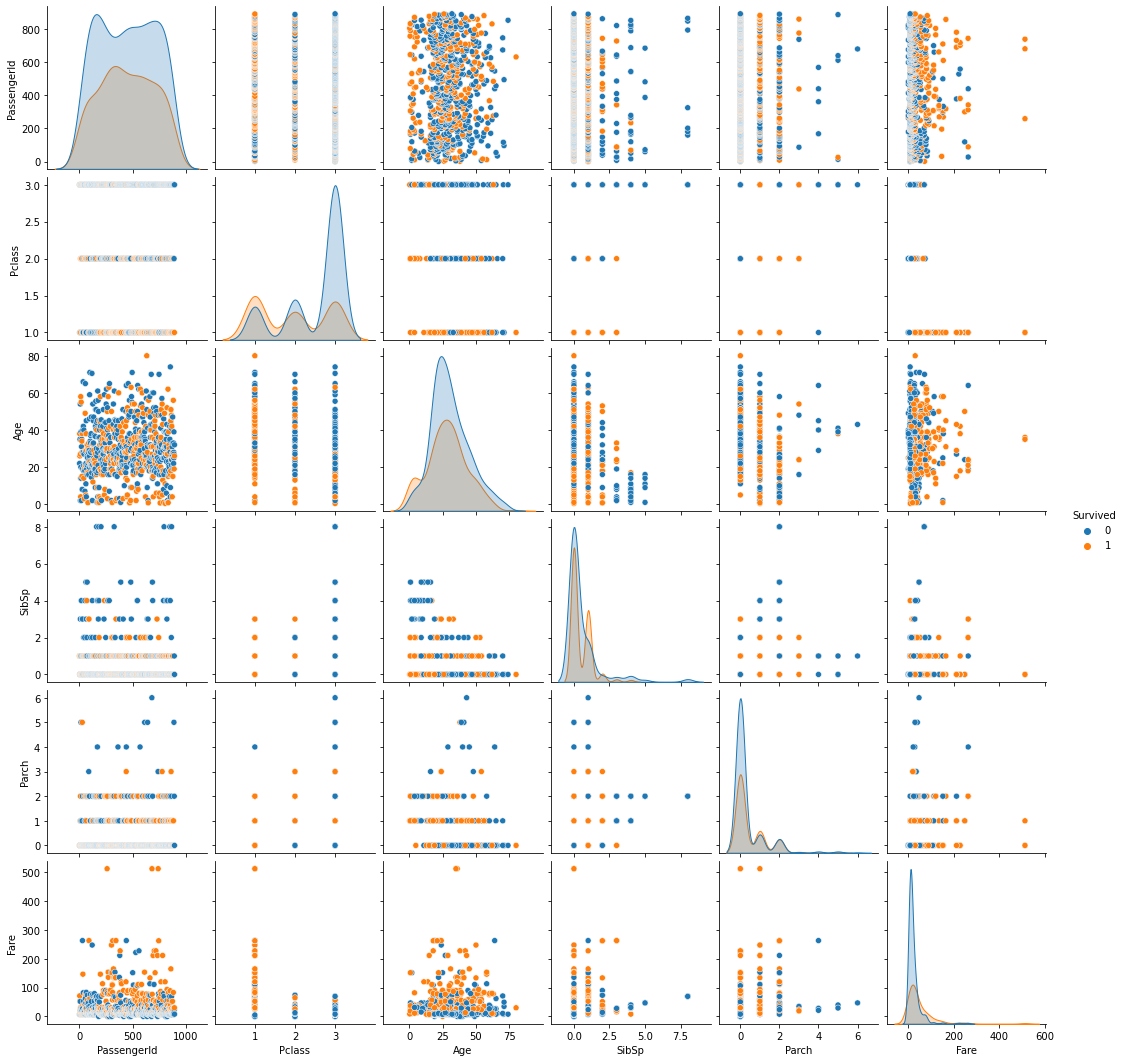

In [20]:
# Checking the pairwise relation in the dataset.
sns.pairplot(df,hue="Survived")

This pair plot gives the pairwise relation between the columns which is plotted on the basis of target variable 'Survived'.

From this pairplot we can observe that the correlation exists between two variables and on the diagonal we can see distribution plotting. We can see the features Age and PassengerId are highly correlated but since PassengerId is taken as index value, we will ignore it.

# Correlation

In [22]:
#Correlation between the target variable and independent variables using HEAT map
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


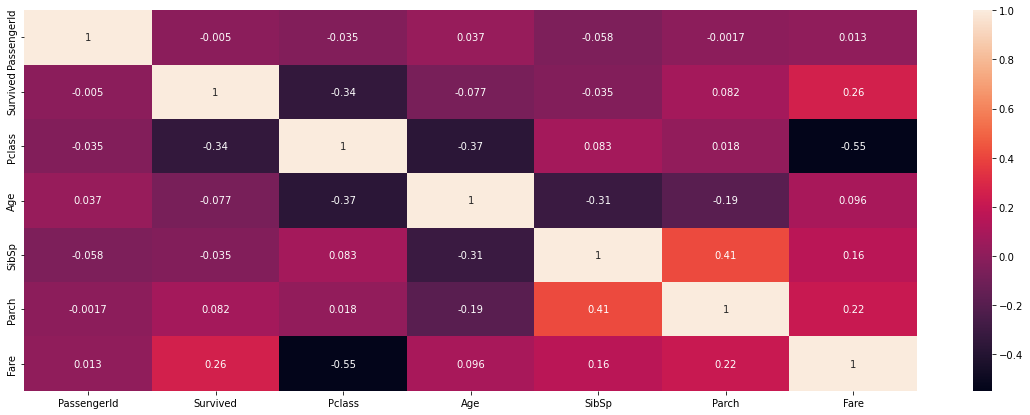

In [24]:
# Plotting the heatmap to visualise and find the coefficient of multicollinearity
plt.figure(figsize=(20,7))
sns.heatmap(df.corr(),annot=True)
plt.show()

We can observe that the feature column Parch and Fare are positively correlated with the target variable "Survived". Pclass is highly negatively correlated with the target variable "Survived". Also the columns SibSp, Age and PassengerId are negatively correlated with the label. The feature columns SibSp and Parch are positively correlated with each other. Light shades are highly correlated. Dark shades are less correlated. Also there are some independent variables which shows highly negative correlattion between each other.

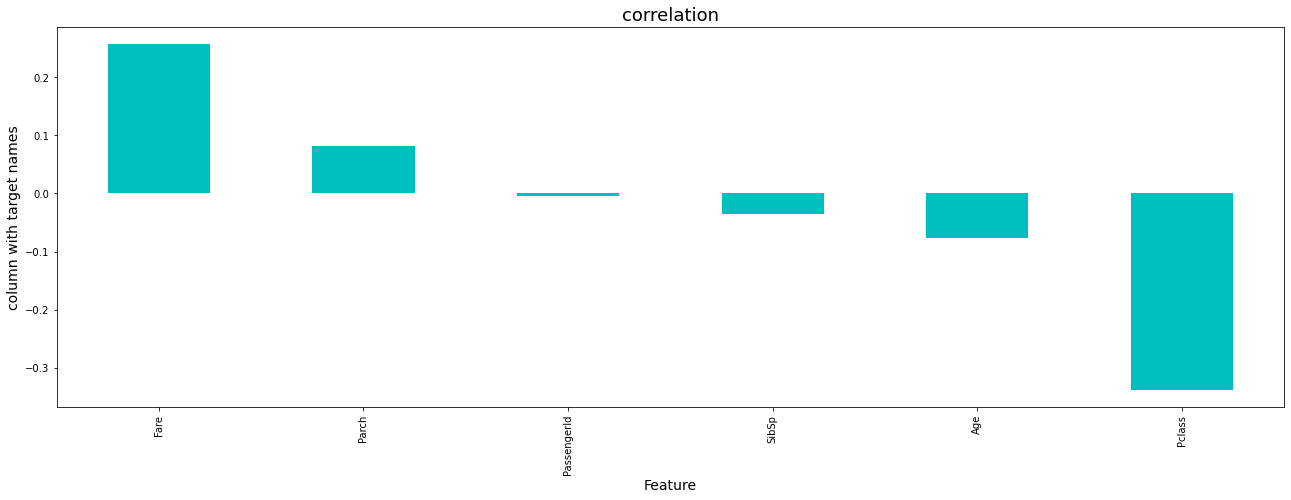

In [25]:
#Visualizing the correlation between label and features using bar plot

plt.figure(figsize=(22,7))
df.corr()['Survived'].sort_values(ascending=False).drop(['Survived']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

Positively correlated:-

Fare

Parch


Negatively correlated:-
    
PassengerId

SibSp

Age

Pclass

Dropping irrelevant column

In [3]:
# Dropping PassengerId column
df.drop('PassengerId', axis=1, inplace = True )
df.drop('Name',axis=1, inplace=True)   # Name has no important to build our madel

In [27]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S


# Data Cleaning and preprocessing

In [28]:
#Checking the null values

df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

Let's treat the features Age, Cabin and Embarked which contains null values. Since the Age column is important, the missing values need to be filled.

Age is a numerical column and has outliers so I will use median method to fill the missing values.
Embarked is a categorical column so we can make use of mode methods to fill the missing values
Cabin column has alphanumerical values and has plenty of missing values so we can't use mean, media or mode method to fill them. So we can either delete that column or we can fill that out with unknown values by using fillna() method.

In [4]:
df["Age"] = df["Age"].fillna(df["Age"].median())

In [5]:
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])

In [6]:
df['Cabin'] = df['Cabin'].fillna('U')

In [32]:
#Chcking null values after filling them
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

<AxesSubplot:>

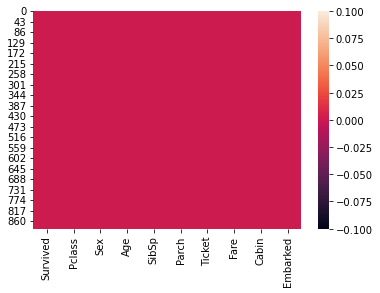

In [33]:
# Visualizing the missing value after treating it using heat map.
sns.heatmap(df.isnull())

# Outliers

<AxesSubplot:xlabel='Age'>

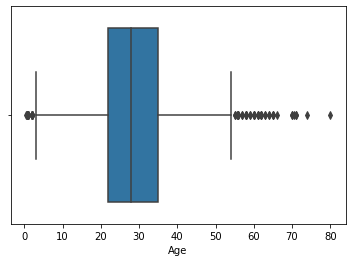

In [35]:
# now check the outliers present in our data using box plot
sns.boxplot(df["Age"])

From above, we can see there are outliers present in the Age column.

<AxesSubplot:xlabel='Fare'>

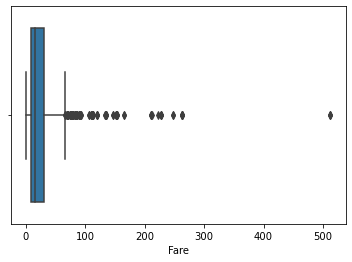

In [36]:
sns.boxplot(df["Fare"])

Fare feature also contains the outliers.

<AxesSubplot:xlabel='SibSp'>

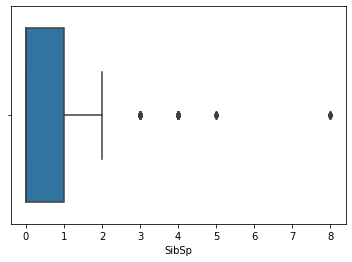

In [37]:
sns.boxplot(df["SibSp"])

Here also we can find outliers in SibSp column.

<AxesSubplot:xlabel='Parch'>

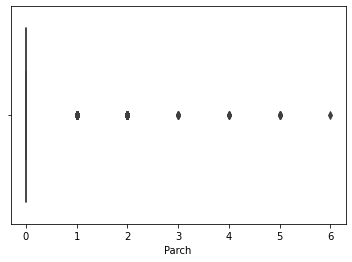

In [38]:
sns.boxplot(df["Parch"])

# Removing Outliers

1. Zscore method

In [39]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')

In [7]:
# Continuous features having outliers 
variables = df[['Age','Fare']]

In [8]:
# Using zscore to remove outliers
from scipy.stats import zscore

z=np.abs(zscore(variables))

z

,Age,Fare
0,0.565736,0.502445
1,0.663861,0.786845
2,0.258337,0.488854
3,0.433312,0.420730
4,0.433312,0.486337
...,...,...
886,0.181487,0.386671
887,0.796286,0.044381
888,0.104637,0.176263
889,0.258337,0.044381


In [9]:
# Creating new dataframe
new_df = df[(z<3).all(axis=1)]
new_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,U,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,U,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,U,S


In [43]:
print(df.shape)
print(new_df.shape)

(891, 10)
(864, 10)


In [44]:
Loss_percentage=(891-864)/891*100
print(Loss_percentage)

3.0303030303030303


This is the percentage loss of our data. Here I am not losing more data so I am removing the outliers.

2. IQR (Inter Quantile Range) method

In [45]:
# 1st quantile
Q1=variables.quantile(0.25)

# 3rd quantile
Q3=variables.quantile(0.75)

# IQR
IQR=Q3 - Q1

df1=df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [46]:
print(df.shape)
print(df1.shape)

(891, 10)
(721, 10)


In [47]:
Loss_percentage=(891-721)/891*100
print(Loss_percentage)

19.07968574635241


Data loss is high using IQR mehod. So we will consider zscore method.

# Skewness

In [49]:
# Checking the skewness
new_df.skew()

Survived    0.502011
Pclass     -0.708375
Age         0.321096
SibSp       3.751753
Parch       2.840412
Fare        2.257178
dtype: float64

Let's remove skewness in Age, SibSp, Parch and Fare which contains numerical data

In [12]:
skewed_features = ["SibSp","Parch","Fare"]

In [10]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box-cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box-cox' or 'yeo-johnson'\n"

In [13]:
new_df[skewed_features] = scaler.fit_transform(new_df[skewed_features].values)
new_df[skewed_features].head()

,SibSp,Parch,Fare
0,1.374574,-0.548637,-0.882769
1,1.374574,-0.548637,1.529038
2,-0.680931,-0.548637,-0.792444
3,1.374574,-0.548637,1.216581
4,-0.680931,-0.548637,-0.776493


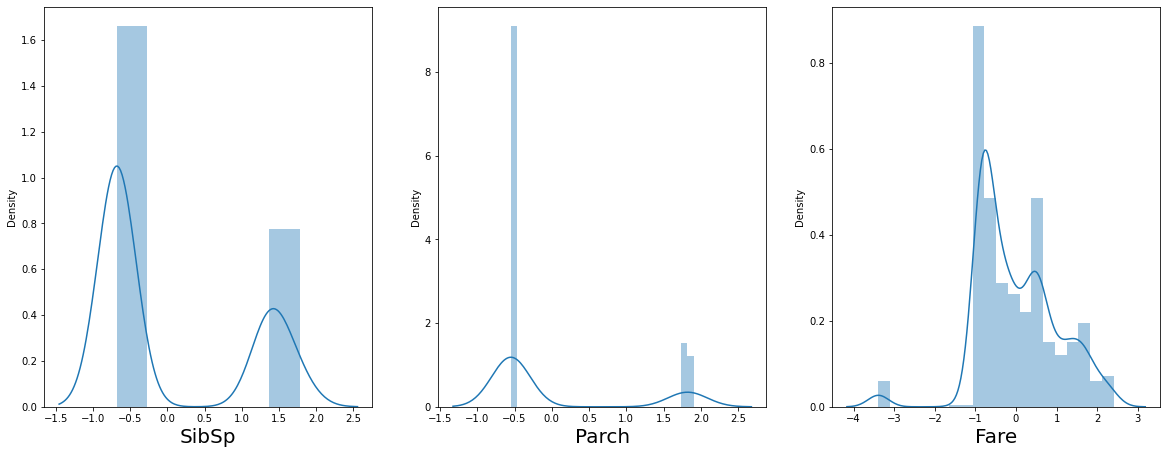

In [53]:
# After removing let's check how the data has been distributed in each column.

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df[skewed_features]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(new_df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

The data is not normal but the skewness has got removed compared to the old data

In [54]:
# Now let's check the skewness
new_df.skew()

Survived    0.502011
Pclass     -0.708375
Age         0.321096
SibSp       0.805038
Parch       1.277888
Fare       -0.009095
dtype: float64

So we can see the skewness is almost reduced here compare to our old data.

Encoding the data using Label Encoding

In [14]:
cols = ["Sex", "Ticket", "Cabin", "Embarked"]

In [15]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
new_df[cols]= new_df[cols].apply(LE.fit_transform)

In [16]:
new_df[cols].head()

,Sex,Ticket,Cabin,Embarked
0,1,517,135,2
1,0,587,70,0
2,0,655,135,2
3,0,48,48,2
4,1,466,135,2


Now our categorical data has been converted into the numerical data. Here we can see the unique value counts of all the encoded columns.

In [58]:
# Dataset after cleaning and encoding
new_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,1,22.0,1.374574,-0.548637,517,-0.882769,135,2
1,1,1,0,38.0,1.374574,-0.548637,587,1.529038,70,0
2,1,3,0,26.0,-0.680931,-0.548637,655,-0.792444,135,2
3,1,1,0,35.0,1.374574,-0.548637,48,1.216581,48,2
4,0,3,1,35.0,-0.680931,-0.548637,466,-0.776493,135,2


In [17]:
x = new_df.drop("Survived", axis=1)
y = new_df["Survived"]

Here we have separated the target variable and independent variable.

In [60]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,1,22.0,1.374574,-0.548637,517,-0.882769,135,2
1,1,0,38.0,1.374574,-0.548637,587,1.529038,70,0
2,3,0,26.0,-0.680931,-0.548637,655,-0.792444,135,2
3,1,0,35.0,1.374574,-0.548637,48,1.216581,48,2
4,3,1,35.0,-0.680931,-0.548637,466,-0.776493,135,2


In [61]:
y.value_counts()

0    537
1    327
Name: Survived, dtype: int64

The data is not balanced. Since we have class imbalancing issue in the dataset so we need to balance it. Here I am using oversampling method to balance the class.

In [62]:

x.shape, y.shape

((864, 9), (864,))

# Oversampling

In [18]:
# Balancing the data using oversampling
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x, y = SM.fit_resample(x,y)

In [64]:
# Checking the value counts again
y.value_counts()

0    537
1    537
Name: Survived, dtype: int64

So we can observe clearly that the data is balanced in both the classes.

<AxesSubplot:xlabel='Survived', ylabel='count'>

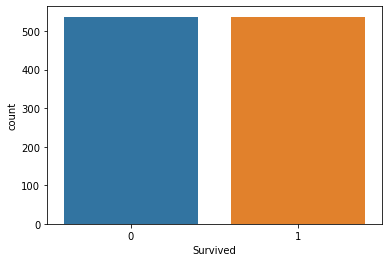

In [65]:
# Visualizing the data after oversampling
sns.countplot(y)

Scaling data using Min-Max Scaler

In [66]:
x.shape, y.shape

((1074, 9), (1074,))

In [19]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
x = pd.DataFrame(mms.fit_transform(x), columns=x.columns)

In [68]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1.0,1.0,0.329064,0.83479,0.0,0.776276,0.432617,1.000000,1.0
1,0.0,0.0,0.573041,0.83479,0.0,0.881381,0.848336,0.518519,0.0
2,1.0,0.0,0.390058,0.00000,0.0,0.983483,0.448186,1.000000,1.0
3,0.0,0.0,0.527295,0.83479,0.0,0.072072,0.794478,0.355556,1.0
4,1.0,1.0,0.527295,0.00000,0.0,0.699700,0.450936,1.000000,1.0


Data is scaled. By using min max scaler we can see that the values are between 0 and 1

# Modeling

In [20]:
#Finding the best random state

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    DTC = DecisionTreeClassifier()
    DTC.fit(x_train, y_train)
    pred = DTC.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.8668730650154799  on Random_state  38


Creating train-test split

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

In [22]:
x_train.shape,y_train.shape, x_test.shape,y_test.shape

((751, 9), (751,), (323, 9), (323,))

# Classification Algorithms

In [23]:
#importing necessary libraries.
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, accuracy_score

# Decision Tree Classifier

In [24]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt = dt.predict(x_test)

print(accuracy_score(y_test, preddt))
print(confusion_matrix(y_test, preddt))
print(classification_report(y_test,preddt))

0.8637770897832817
[[140  25]
 [ 19 139]]
              precision    recall  f1-score   support

           0       0.88      0.85      0.86       165
           1       0.85      0.88      0.86       158

    accuracy                           0.86       323
   macro avg       0.86      0.86      0.86       323
weighted avg       0.86      0.86      0.86       323



Here we are getting 86% accuracy

Text(0.5, 1.0, 'Confusion Matrix for Decision Tree Classifier')

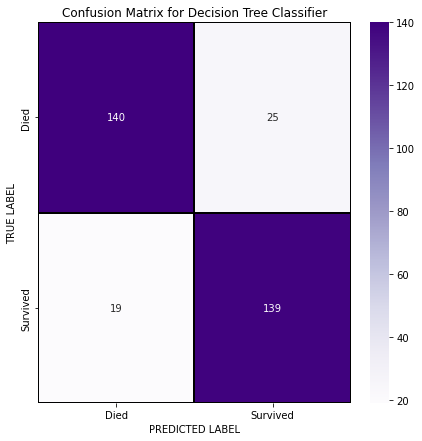

In [25]:
# Lets plot confusion matrix for Decision Tree
cm = confusion_matrix(y_test,preddt)

x_axis_labels = ["Died","Survived"]
y_axis_labels = ["Died","Survived"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", 
xticklabels=x_axis_labels,
yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree Classifier')

True-Positive = 140 False-Positive = 25 False-Negative = 19 True-Negative = 139

# Random Forest Classifier

In [26]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
predrf = rf.predict(x_test)

print(accuracy_score(y_test, predrf))
print(confusion_matrix(y_test, predrf))
print(classification_report(y_test,predrf))

0.8730650154798761
[[144  21]
 [ 20 138]]
              precision    recall  f1-score   support

           0       0.88      0.87      0.88       165
           1       0.87      0.87      0.87       158

    accuracy                           0.87       323
   macro avg       0.87      0.87      0.87       323
weighted avg       0.87      0.87      0.87       323



Here we are getting 87% accuracy

Text(0.5, 1.0, 'Confusion Matrix for Random Forest Classifier')

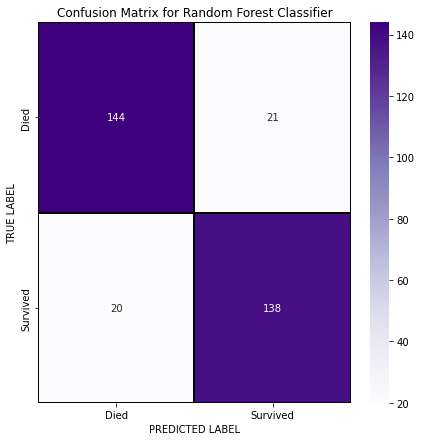

In [27]:
# Lets plot confusion matrix for Random Forest Classifier
cm = confusion_matrix(y_test,predrf)

x_axis_labels = ["Died","Survived"]
y_axis_labels = ["Died","Survived"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", 
xticklabels=x_axis_labels,
yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Random Forest Classifier')

True-Positive = 144 False-Positive = 21 False-Negative = 20 True-Negative = 138

# Support Vector Machine Classifier

In [28]:
svc = SVC()
svc.fit(x_train,y_train)
predsvc = svc.predict(x_test)

print(accuracy_score(y_test, predsvc))
print(confusion_matrix(y_test, predsvc))
print(classification_report(y_test,predsvc))

0.8390092879256966
[[143  22]
 [ 30 128]]
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       165
           1       0.85      0.81      0.83       158

    accuracy                           0.84       323
   macro avg       0.84      0.84      0.84       323
weighted avg       0.84      0.84      0.84       323



Here we are getting 84% accuracy

Text(0.5, 1.0, 'Confusion Matrix for Support Vector Machine CLassifier')

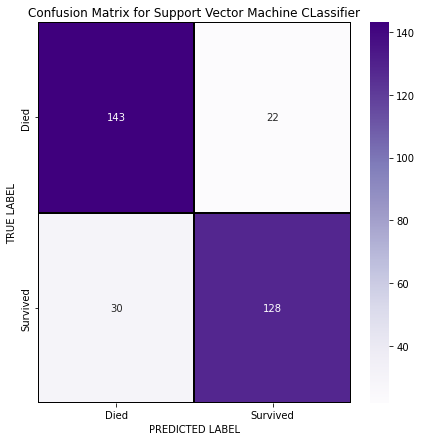

In [29]:
# Lets plot confusion matrix for SVC
cm = confusion_matrix(y_test,predsvc)

x_axis_labels = ["Died","Survived"]
y_axis_labels = ["Died","Survived"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", 
xticklabels=x_axis_labels,
yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Support Vector Machine CLassifier')

True-Positive = 143 False-Positive = 22 False-Negative = 30 True-Negative = 128

# Logistic Regression

In [30]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
predlr=lr.predict(x_test)

print(accuracy_score(y_test, predlr))
print(confusion_matrix(y_test, predlr))
print(classification_report(y_test,predlr))

0.804953560371517
[[128  37]
 [ 26 132]]
              precision    recall  f1-score   support

           0       0.83      0.78      0.80       165
           1       0.78      0.84      0.81       158

    accuracy                           0.80       323
   macro avg       0.81      0.81      0.80       323
weighted avg       0.81      0.80      0.80       323



Here we are getting 80% accuracy

Text(0.5, 1.0, 'Confusion Matrix for Logistic Regression')

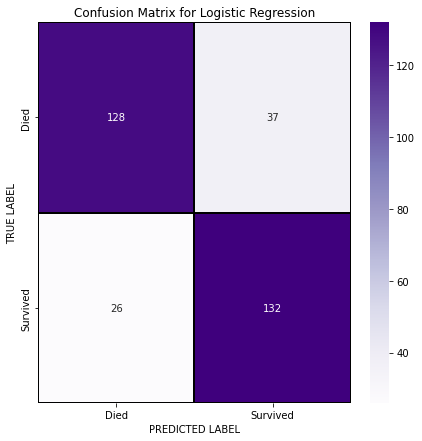

In [31]:
# Lets plot confusion matrix for Logistic Regression
cm = confusion_matrix(y_test,predlr)

x_axis_labels = ["Died","Survived"]
y_axis_labels = ["Died","Survived"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", 
xticklabels=x_axis_labels,
yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Logistic Regression')

True-Positive = 128 False-Positive = 37 False-Negative = 26 True-Negative = 132

# KNN Classifier

In [32]:
knn = KNN()
knn.fit(x_train,y_train)
predknn = knn.predict(x_test)

print(accuracy_score(y_test, predknn))
print(confusion_matrix(y_test, predknn))
print(classification_report(y_test,predknn))

0.8204334365325078
[[139  26]
 [ 32 126]]
              precision    recall  f1-score   support

           0       0.81      0.84      0.83       165
           1       0.83      0.80      0.81       158

    accuracy                           0.82       323
   macro avg       0.82      0.82      0.82       323
weighted avg       0.82      0.82      0.82       323



Here we are getting 82% accuracy

Text(0.5, 1.0, 'Confusion Matrix for  KNN classifier')

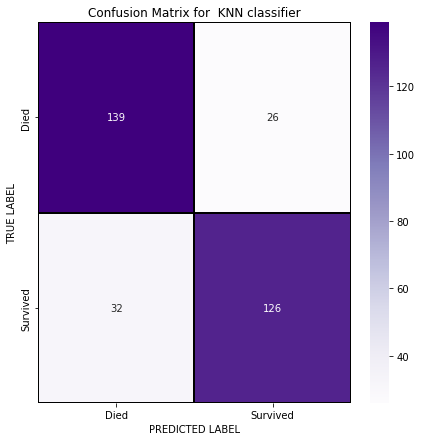

In [33]:
# Lets plot confusion matrix for KNN classifier
cm = confusion_matrix(y_test,predknn)

x_axis_labels = ["Died","Survived"]
y_axis_labels = ["Died","Survived"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", 
xticklabels=x_axis_labels,
yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for  KNN classifier')

True-Positive = 139 False-Positive = 26 False-Negative = 32 True-Negative = 126

# Gradient Boosting Classifier

In [34]:
gb = GradientBoostingClassifier()
gb.fit(x_train,y_train)
predgb = gb.predict(x_test)

print(accuracy_score(y_test, predgb))
print(confusion_matrix(y_test, predgb))
print(classification_report(y_test,predgb))

0.8513931888544891
[[138  27]
 [ 21 137]]
              precision    recall  f1-score   support

           0       0.87      0.84      0.85       165
           1       0.84      0.87      0.85       158

    accuracy                           0.85       323
   macro avg       0.85      0.85      0.85       323
weighted avg       0.85      0.85      0.85       323



Here we are getting 85% accuracy

Text(0.5, 1.0, 'Confusion Matrix for  Gradient Boosting classifier')

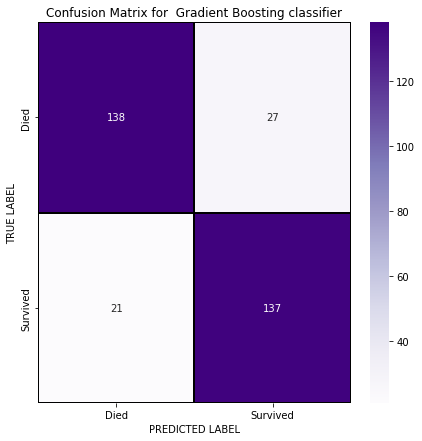

In [35]:
# Lets plot confusion matrix for Gradient Boosting classifier
cm = confusion_matrix(y_test,predgb)

x_axis_labels = ["Died","Survived"]
y_axis_labels = ["Died","Survived"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", 
xticklabels=x_axis_labels,
yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for  Gradient Boosting classifier')

True-Positive = 138 False-Positive = 27 False-Negative = 21 True-Negative = 137

# Cross Validation Score for all models

In [37]:
from sklearn.model_selection import cross_val_score

In [38]:
# cv score for Decision Tree Classifier
print('CV score  of Decision tree',cross_val_score(dt,x,y,cv=5).mean())

CV score  of Decision tree 0.8222212562486415


In [39]:
# cv score for Random Forest Classifier
print('Cvscore  for Random forest',cross_val_score(rf,x,y,cv=5).mean())

Cvscore  for Random forest 0.8585307541838733


In [40]:
# cv score for Support Vector  Classifier
print('CV score  for the SVM',cross_val_score(svc,x,y,cv=5).mean())

CV score  for the SVM 0.8333927407085415


In [41]:
# cv score for Logistic Regression 
print('CV score  for Logistic rgerssion',cross_val_score(lr,x,y,cv=5).mean())

CV score  for Logistic rgerssion 0.8017213649206696


In [42]:
# cv score for KNN Classifier
print('CV score   for the KNN',cross_val_score(knn,x,y,cv=5).mean())

CV score   for the KNN 0.8157052814605521


In [43]:
# cv score for Gradient Boosting Classifier
print('Cv score  for  the Gradient boosting',cross_val_score(gb,x,y,cv=5).mean())

Cv score  for  the Gradient boosting 0.8547880895457508


From the observation of accuracy and cross validation score and their difference we can predict that Logistic Regression is the best model.

# Hyper parameter tuning

In [44]:
from sklearn.model_selection import GridSearchCV

In [48]:
# Logistic Regression
parameters = {
    'penalty' : ['l1','l2'], 
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
}

In [49]:
gcv=GridSearchCV(LogisticRegression(),parameters,cv=5)

In [58]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']})

In [59]:
gcv.best_params_

{'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}

In [60]:
Titanic_survived = LogisticRegression(C=0.1,penalty="l2")
Titanic_survived.fit(x_train, y_train)
pred = Titanic_survived.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

79.56656346749226


Here the final model gives 79.56% accuracy after tuning.

# Plotting ROC and compare AUC for all the models

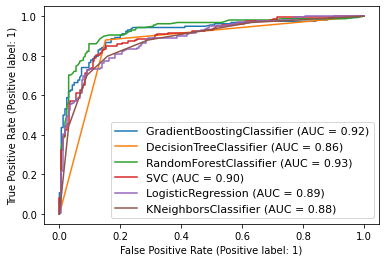

In [61]:
# Plotting for all the models used here
from sklearn import datasets 
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve 
disp = plot_roc_curve(gb,x_test,y_test)
plot_roc_curve(dt, x_test, y_test, ax=disp.ax_)     # ax_=Axes with confusion matrix
plot_roc_curve(rf, x_test, y_test, ax=disp.ax_)
plot_roc_curve(svc, x_test, y_test, ax=disp.ax_)
plot_roc_curve(lr, x_test, y_test, ax=disp.ax_)
plot_roc_curve(knn, x_test, y_test, ax=disp.ax_)

plt.legend(prop={'size':11}, loc='lower right')
plt.show()

Above is the AUC-ROC curve for the models which is plotted False positive rate against True positive rate

# Plotting ROC-AUC curve for best model

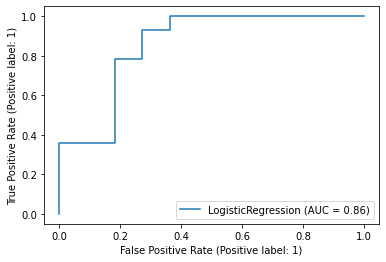

In [62]:
# Support Vector Machine Classifier
from sklearn import datasets 
from sklearn import metrics
from sklearn import model_selection
x,y = datasets.make_classification (random_state=30)
x_train, x_test, y_train, y_test = model_selection.train_test_split(x,y,random_state=30)
df = LogisticRegression(random_state=30)
df.fit(x_train, y_train)
metrics.plot_roc_curve(df, x_test, y_test)
plt.show()

So the best model has the area under curve as 0.86

# Saving the model

In [63]:
import pickle
filename='Titanic_Survive.pkl'
pickle.dump(lr,open(filename,'wb'))